<a href="https://colab.research.google.com/github/Jaguar838/BANK/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%B8%D0%B3%D1%80%D1%8B_%C2%AB%D0%9C%D0%B5%D0%BC%D1%82%D1%80%D0%B8%D1%81%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Данные**

*   *user_id* — уникальный идентификатор пользователя;
*   *game_id* — уникальный идентификатор игры;
*   *round* — уровень игры;
*   *compactor* — наличие уплотнителя;
*   *win* — победа (1) или проигрыш (0);
*   *game_mode* — стиль игры, hard или easy: выяснила у разработчиков, что в режиме easy игроки видят, какая фигура выпадет следующей, а в режиме hard — нет.

**Проблема**

Игроки жалуются, что уплотнитель даёт слишком большое преимущество купившим его игрокам.

**Гипотеза**

Процент побед у применяющих уплотнитель игроков выше, чем у игроков без уплотнителя.


In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Під'єднуємось до гугл диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# шлях до датасету з даними про ігри
game_data_file_path = '/content/drive/MyDrive/ColabNotebooks/DataSience/game_data.csv'
# чтение файла
games = pd.read_csv(game_data_file_path)
games

,user_id,game_id,round,compactor,win,game_mode
0,3b7b1851-8fa1-43dd-9b40-76d37d085142,ec5a82a0-c106-40b7-acbf-0b90f3bf7333,2,False,0,hard
1,5e333a91-62d5-4c07-b017-25bdee9bd158,d9a513ee-be8f-4025-81a1-4f8c06bf652e,2,False,1,easy
2,00f7430f-f4aa-4bee-83f0-21ea6ac34dd6,87c83edb-9cb0-4280-9417-2763b39b44c5,3,True,1,hard
3,cc379bf3-2381-4ec4-81cb-87d823f94642,27fd0dba-424a-4a07-9959-0d584c2fb40f,3,False,1,hard
4,dbca4926-2dda-4993-b639-5485a1a3c93a,46ff0dba-0145-40e7-bd83-66618b728661,2,False,0,hard
5,826073ae-4e46-49b6-b7c4-14bd43eb136e,0f39b25e-809b-4533-a765-a130ca759725,4,False,0,hard
6,a4201a40-dcb7-430b-a8cb-0a61329571b7,4928fee9-96bd-4a0b-be9d-f38db1d00d87,1,False,1,hard
7,79199616-f926-4214-a094-8388aa4e4498,3f6d30e7-d605-4275-bb6e-513041d9ad33,2,False,0,easy
8,dc559b1a-bfd8-428e-b264-7cbcea28138b,8c4cc82b-d707-4fc7-bb1a-b6fac01ba754,2,False,0,hard
9,6732dd52-d24e-4e99-94cd-fd69fa091fde,b05f58e5-530d-4f52-bd77-d9cc665a97d8,5,False,1,easy


**Посмотрим, как распределены значения в столбцах**

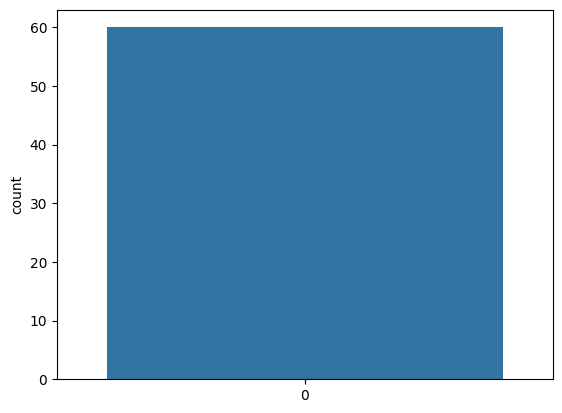

In [4]:
sns.countplot(games['round']);

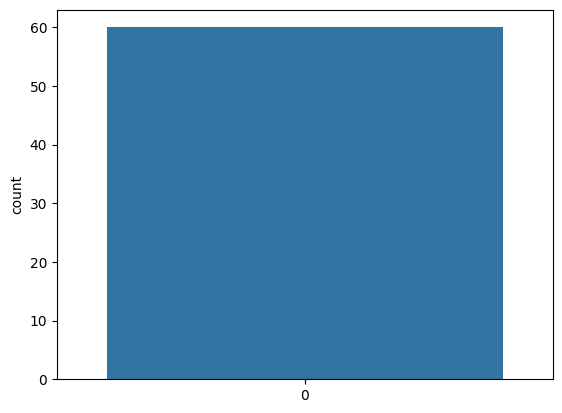

In [5]:
sns.countplot(games['compactor']);

In [6]:
sns.countplot(games['game_mode']);

ValueError: ignored

*    В игре 5 уровней. Больше всего игроков сосредоточено на 3-м уровне. Это объяснимо: до него достаточно легко добраться, а вот перейти на 4-й уровень уже сложнее;
*    Уплотнитель применяют примерно в трети игр;
*    Побед больше, чем поражений;
*    Большая часть игр проходит в режиме hard.

**Проверим гипотезу**

Посчитаем долю побед среди тех, кто применяет уплотнитель и среди тех, кто не применяет его.


In [ ]:
games_compactor_on = games[games['compactor'] == True]
games_compactor_off = games[games['compactor'] == False]

In [7]:
# Игры с уплотнителем:
sns.countplot(games_compactor_on['win']);

NameError: ignored

In [8]:
# Игры без уплотнителя:
sns.countplot(games_compactor_off['win']);

NameError: ignored

In [ ]:
def get_wins_percent(data):
    return int(round(data['win'].mean() * 100))

print('Выигрышей с уплотнителем:', get_wins_percent(games_compactor_on), '%')
print('Выигрышей без уплотнителя:', get_wins_percent(games_compactor_off), '%')



Доля побед в играх с уплотнителем действительно больше. При этом нельзя утверждать, что наличие уплотнителя влияет на исход игры. Например, может быть так, что уплотнитель покупают более сильные игроки — у них и без уплотнителя процент побед будет больше. Или наоборот: уплотнитель покупают на начальных уровнях игры, где процент побед может быть выше сам по себе.

Можно было бы выбрать определённого игрока и посмотреть, как часто этот игрок побеждает без уплотнителя и с уплотнителем. К сожалению, так сделать не выйдет: каждая игра в таблице связана с новым игроком. Это можно понять из следующей команды:


In [9]:
len(set(games['user_id']))

60



Число уникальных игроков совпадает с количеством строк в датасете.

Что можно сделать?

Рассмотреть различные срезы: по раундам, по game_mode. Проверить, действительно ли уплотнитель положительно влияет на каждый из срезов. Если это так, то гипотеза о том, что уплотнитель становится причиной побед, набирает некоторую силу. Хотя сказать наверняка, что нет никакой скрытой причины, которая приводит и к победе, и к покупке уплотнителя, мы по-прежнему не сможем. Например, в игре может быть какой-нибудь баг, который приводит к автоматической покупке уплотнителя в момент победы.
**Влияние уплотнителя в разных раундах**


In [10]:
for game_round in [1, 2, 3, 4, 5]:
    print('Round', game_round)
    print('Выигрышей с уплотнителем:', 
          get_wins_percent(games_compactor_on[games_compactor_on['round'] == game_round]),
          '%')
    print('Выигрышей без уплотнителя:',
          get_wins_percent(games_compactor_off[games_compactor_off['round'] == game_round]),
          '%')
    print()

Round 1


NameError: ignored

На первом, втором и пятом уровнях наличие уплотнителя связано с бóльшим количеством поражений, в то время как для на третьем и четвёртом — с бóльшим количеством побед.
**Влияние уплотнителя в разных режимах игры**

In [11]:
for game_mode in ['hard', 'easy']:
    print('Mode', game_mode)
    print('Доля выигрышей с уплотнителем:',
          get_wins_percent(games_compactor_on[games_compactor_on['game_mode'] == game_mode]),
          '%')
    print('Доля выигрышей без уплотнителя:',
          get_wins_percent(games_compactor_off[games_compactor_off['game_mode'] == game_mode]),
          '%')
    print()

Mode hard


NameError: ignored



В режиме hard наличие уплотнителя связано с очень большой долей побед.

А вот в режиме easy уплотнитель даже несколько ухудшает результат.

**Выводы**

Наличие уплотнителя в среднем связано с бóльшим количеством побед: 63% против 55%.

При этом для некоторых уровней или режимов игры его влияние неоднозначно: на 1-м, 2-м и 5-м уровнях применяющие уплотнитель игроки одерживают даже меньше побед, чем игроки без уплотнителя. Сильнее всего влияние уплотнителя заметно в играх режима hard: там уплотнитель приводит к 73% победам против 54% при игре без уплотнителя.

Такая значительная разница говорит о том, что жалобы игроков обоснованы.

**Уплотнитель заметно влияет на баланс игры, но только в режиме hard или на 3-м и 4-м уровнях игры.**
